# Imports and definitions

In [1]:
import sys, math; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# Auxiliary functions

In [97]:
def plot_var_on_off_time(var = 'pim_E', bins = np.linspace(0,8,100), xlabel='$E_{\pi^-}$ [GeV]' ):

    h, h_err = dict(), dict()
    fig = plt.figure(figsize=(9,8), tight_layout=True)

    ax = fig.add_subplot(2,1,1)
    x, h['on-time'], x_err, h_err['on-time']   = plot_step_hist(data_ontime[var],   bins=bins, label='on-time',  weights=data_ontime.accidweight, color='royalblue');
    x, h['off-time'], x_err, h_err['off-time'] = plot_step_hist(data_offtime[var],  bins=bins, label='off-time', weights=-data_offtime.accidweight, color='red');
    set_axes(ax, '', 'Frequency', do_add_grid=True, do_add_legend=True, remove_ticks_x=True);

    h['on-off'] = h['on-time'] - h['off-time']
    h_err['on-off'] = np.sqrt(np.square(h_err['on-time']) + np.square(h_err['off-time']))


    ax = fig.add_subplot(2,1,2)
    plt.errorbar( x=x, y=h['on-off'], xerr=x_err, yerr=h_err['on-off'], linestyle='None', color='k' )
    set_axes(ax, xlabel, 'On - Off', do_add_grid=True, ylim=(0,1.2*np.max(h['on-off'])));



# Load data


$\gamma d \to \pi^- \pi^0 p (n)$

In [110]:
data_dir = "/Users/erezcohen/Desktop/data/GlueX/BranchingRatios/"
data = pd.read_csv(data_dir + 'rhoMinus_p_090662.csv', delimiter=',')
data_ontime  = data[data.accidweight == 1]
data_offtime = data[data.accidweight < 0]

# Plot histograms

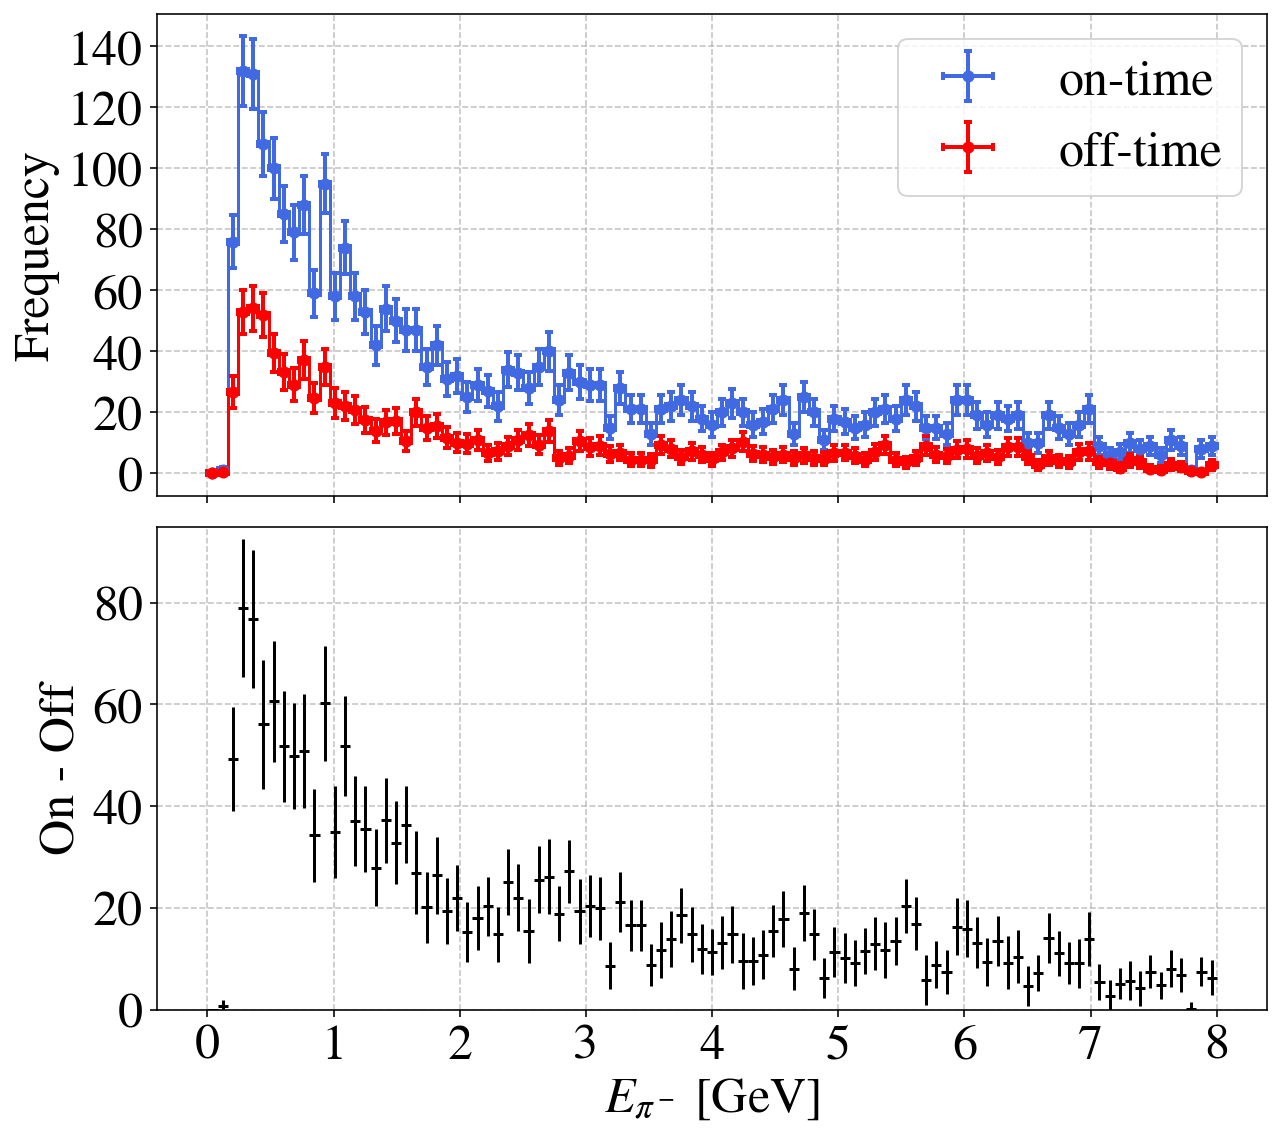

In [106]:
plot_var_on_off_time(var = 'pim_E', bins = np.linspace(0,8,100), xlabel='$E_{\pi^-}$ [GeV]' )

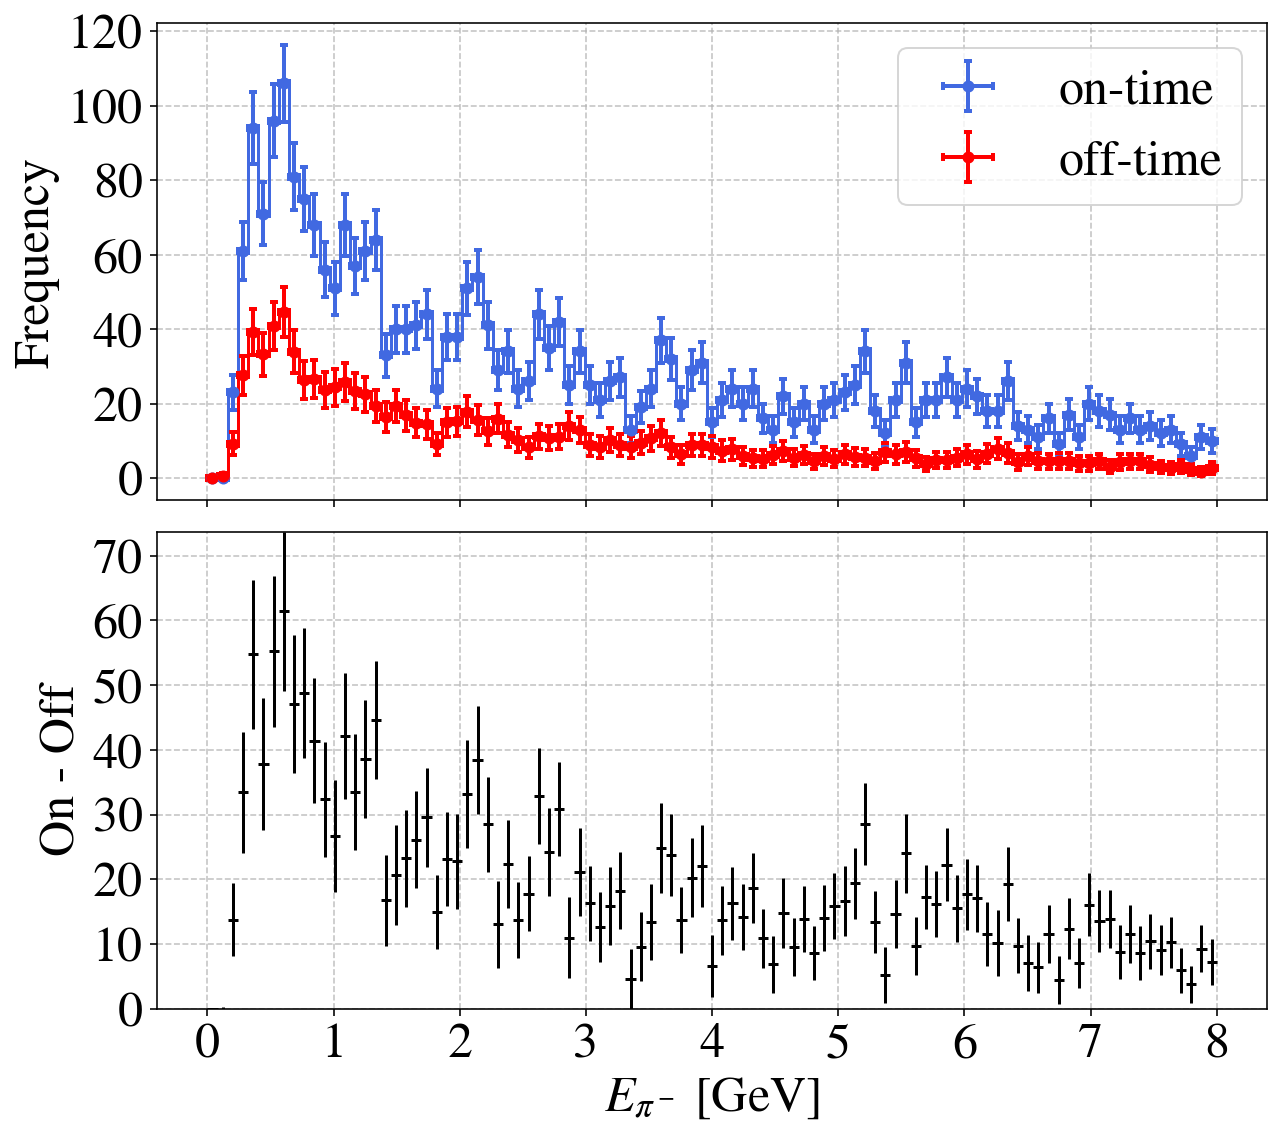

In [111]:
plot_var_on_off_time(var = 'pi0_E', bins = np.linspace(0,8,100), xlabel='$E_{\pi^-}$ [GeV]' )

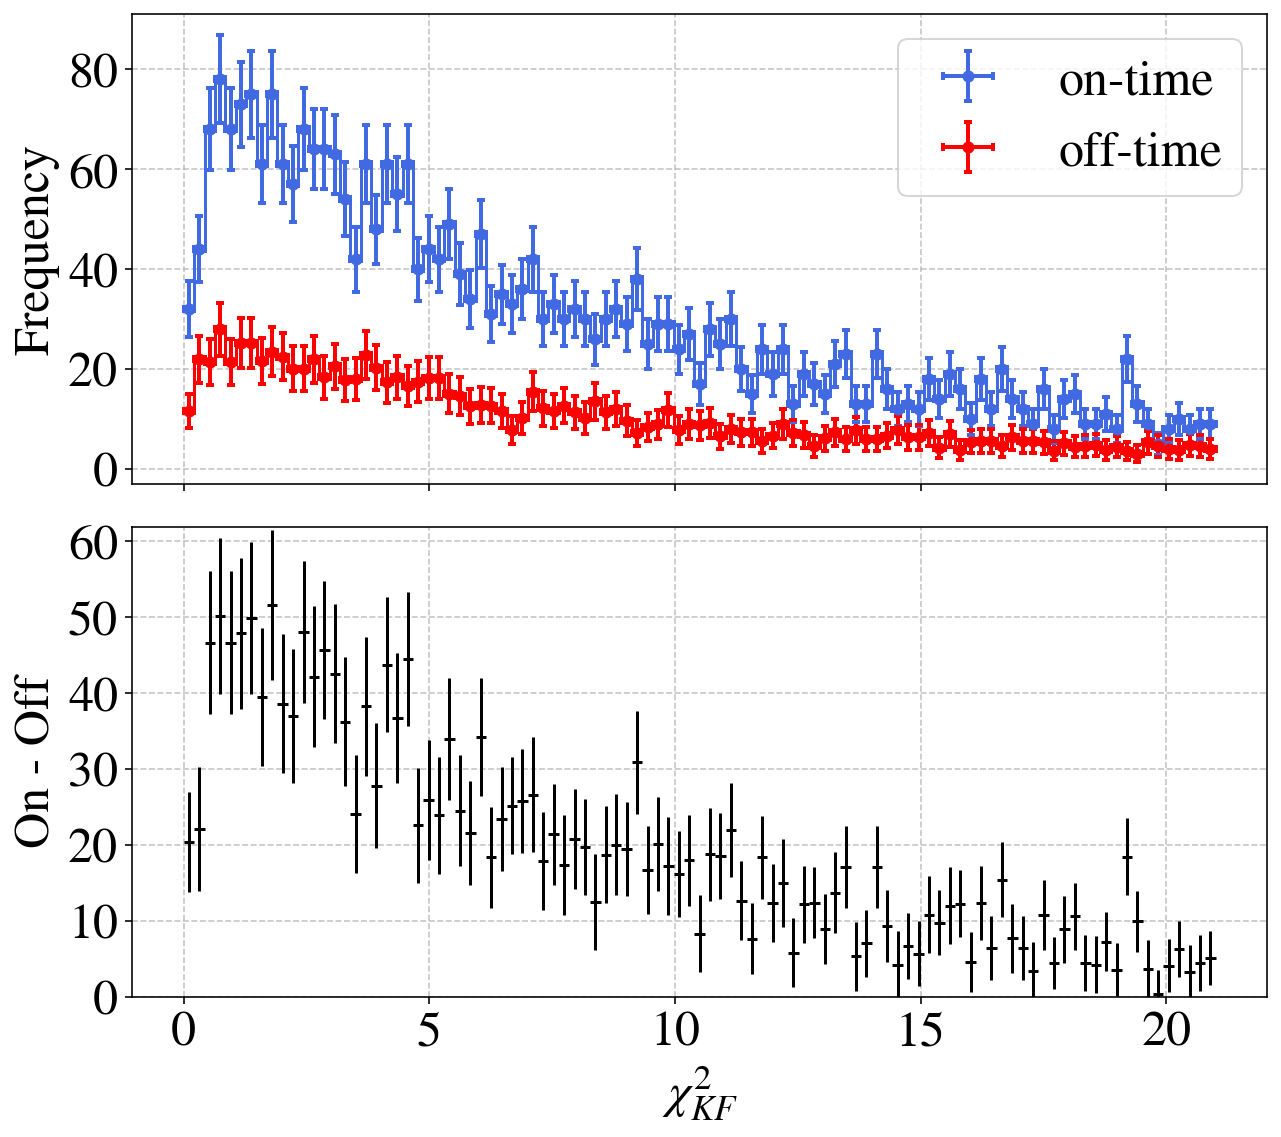

In [109]:
plot_var_on_off_time(var = 'kin_chisq', bins = np.linspace(0,21,100), xlabel='$\chi^2_{KF}$' )